In [1]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# ==========================================
# HADAMARD GATE VISUALIZATION & ANALYSIS
# Compatible with Qiskit 2.x
# ==========================================

# -------------------------
# 1️⃣ Imports
# -------------------------
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

In [3]:

# -------------------------
# 2️⃣ Helper Function
# -------------------------
def visualize_hadamard(init_state_vector, label):
    """
    Applies Hadamard to a single-qubit initial state and visualizes results.
    """
    # Build circuit for measurement
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    # Statevector before measurement
    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("After Hadamard, statevector:", state_after.data)

    # Visualizations
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    # Simulation with AerSimulator
    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("\n")

--- |0> ---
After Hadamard, statevector: [0.70710678+0.j 0.70710678+0.j]


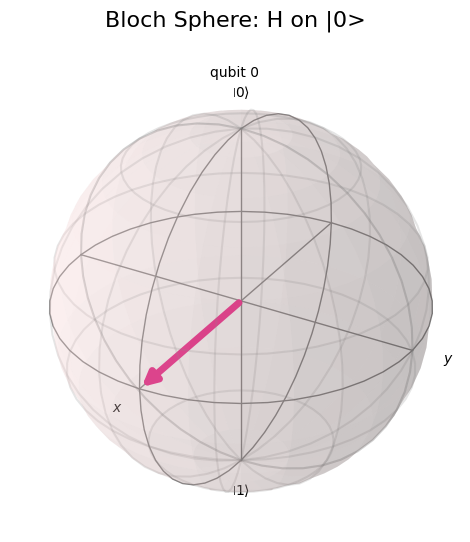

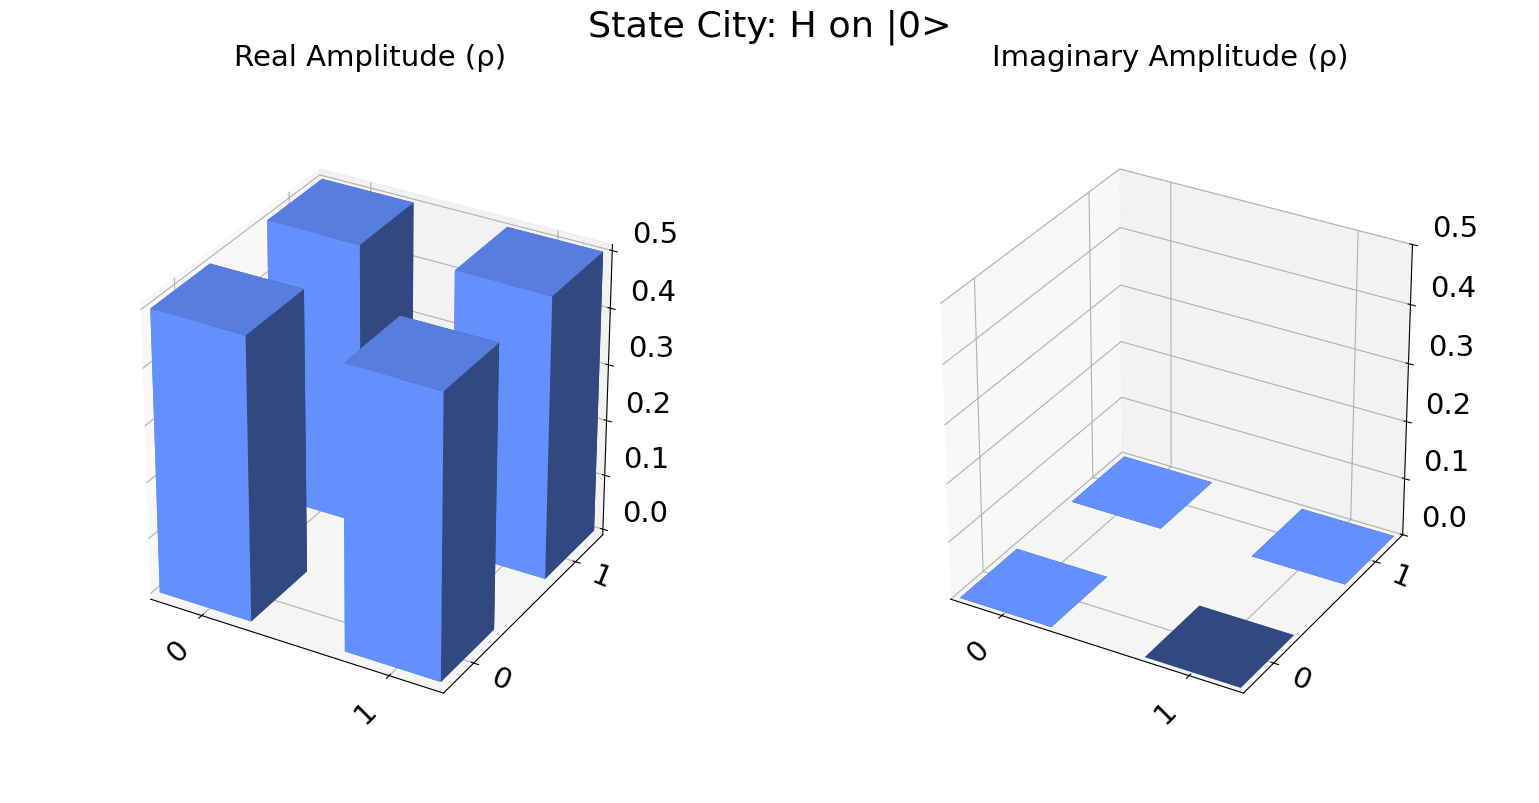

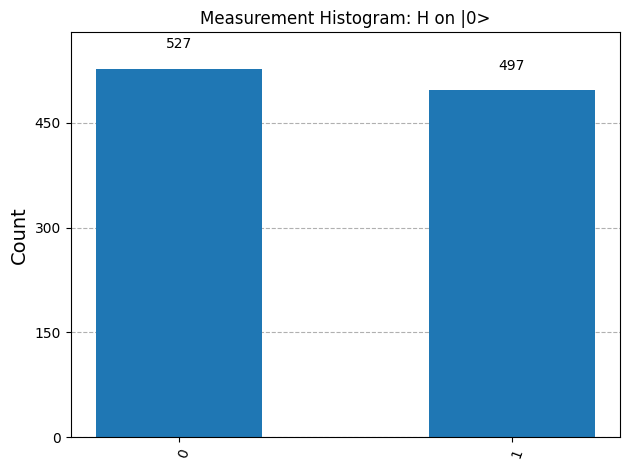



--- |1> ---
After Hadamard, statevector: [ 0.70710678+0.j -0.70710678+0.j]


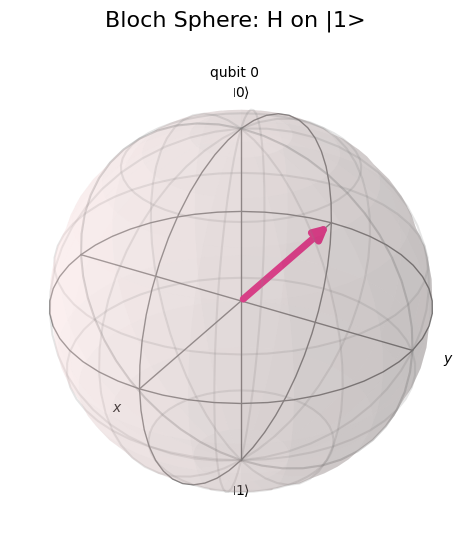

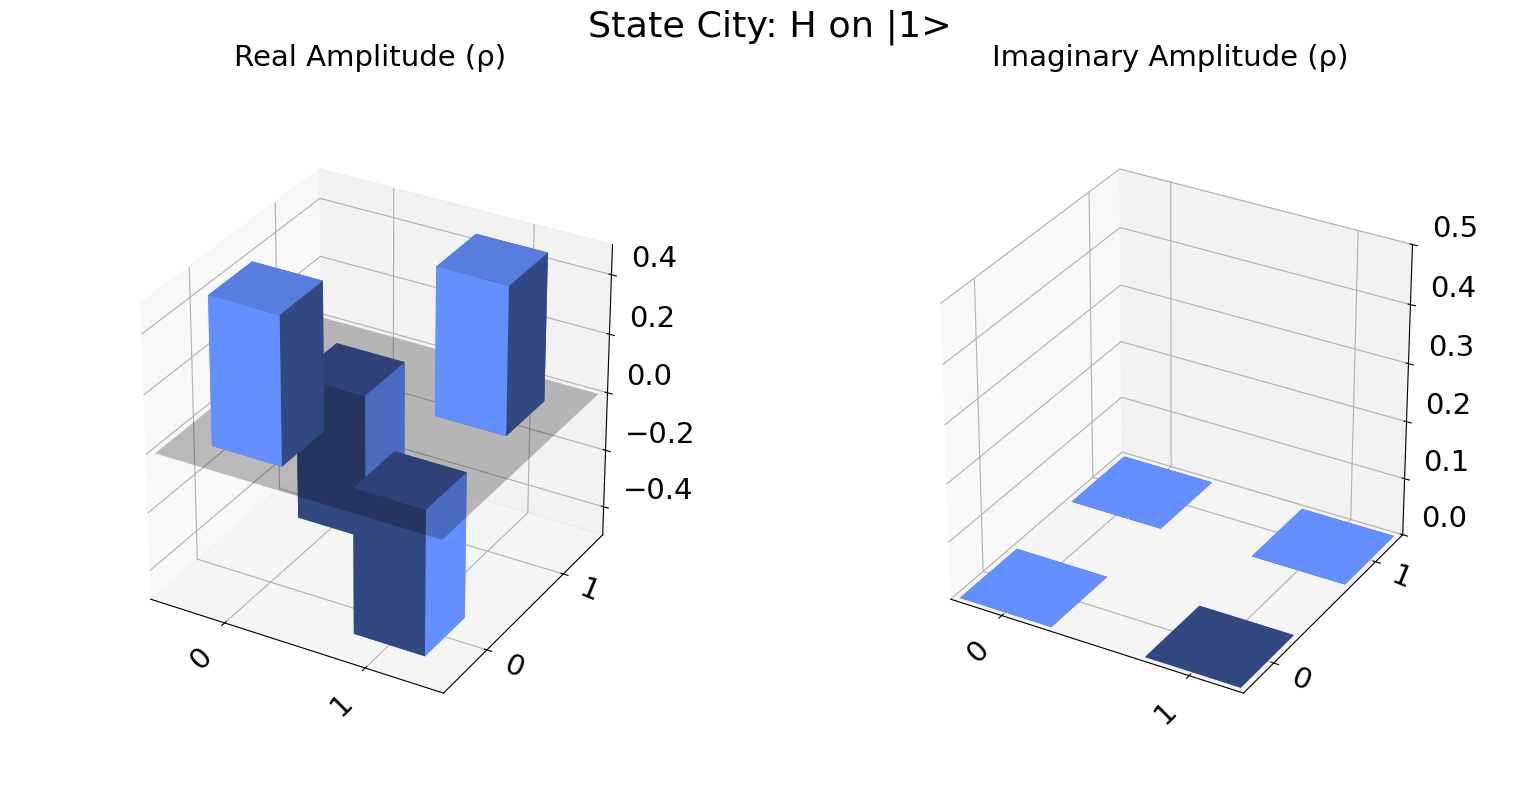

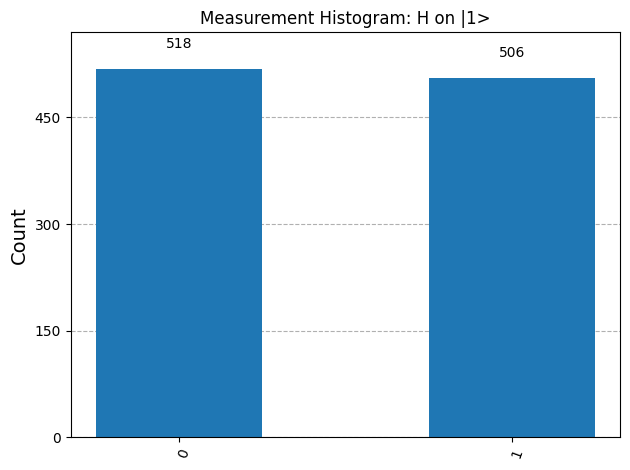



--- |+> ---
After Hadamard, statevector: [1.+0.j 0.+0.j]


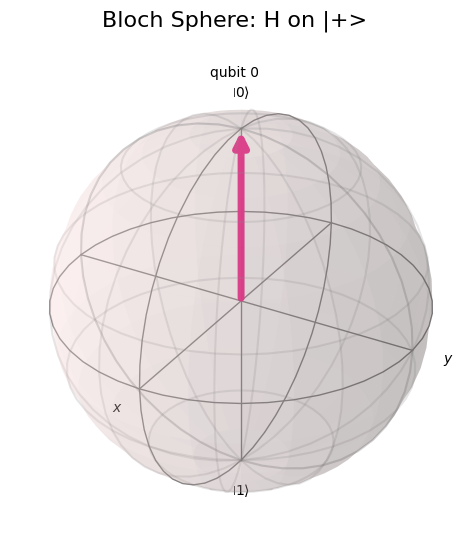

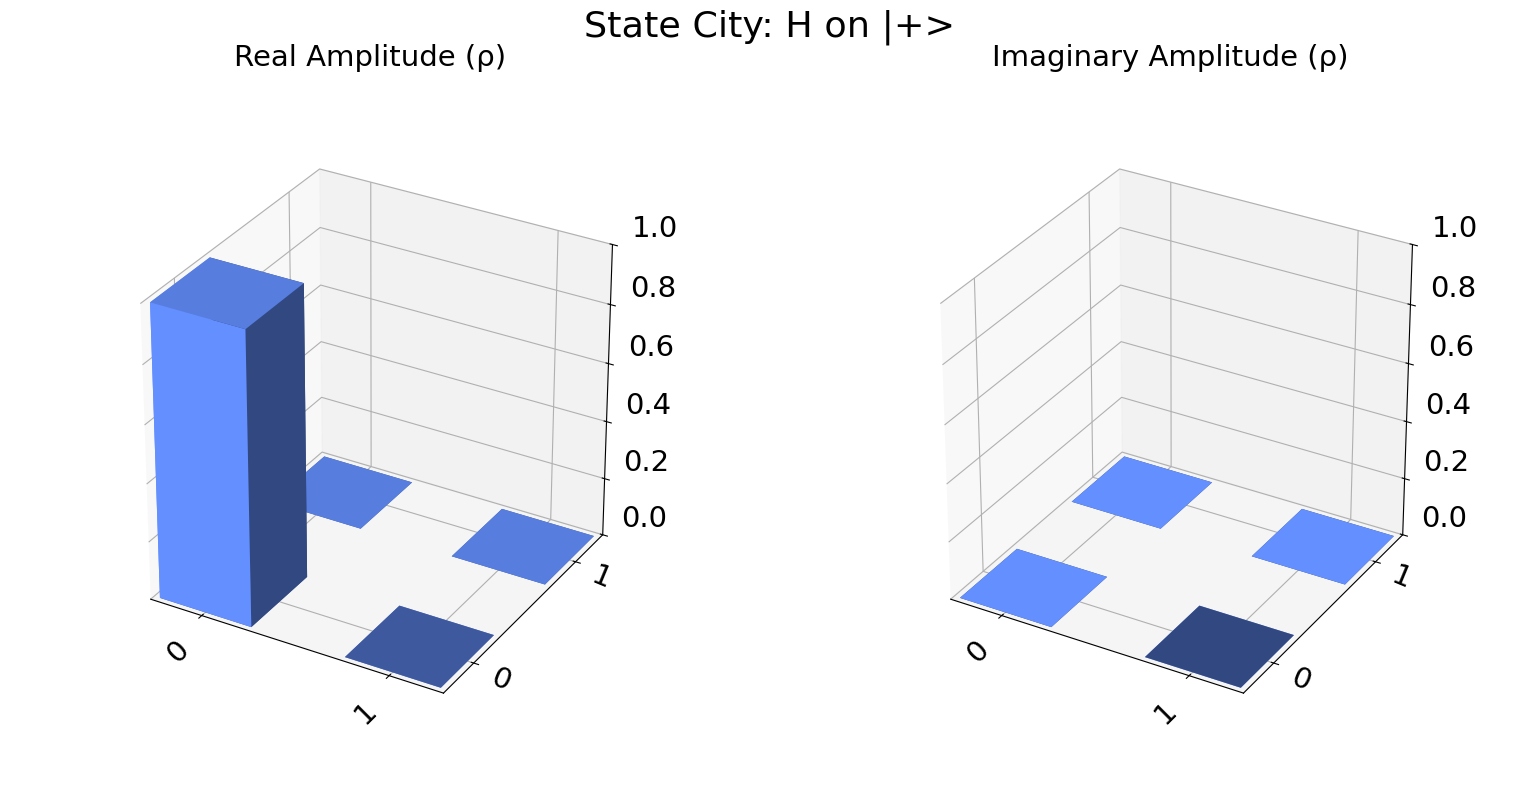

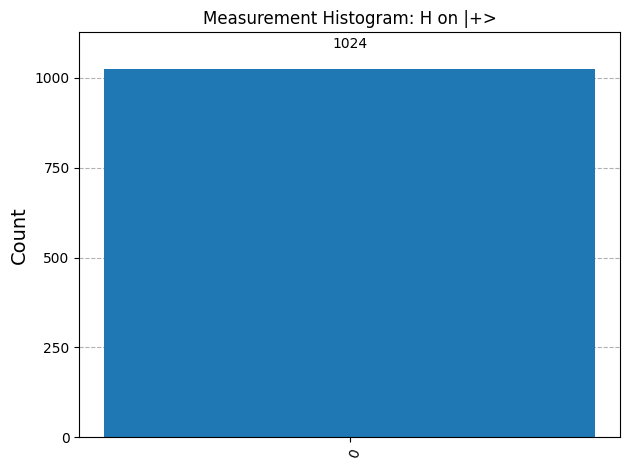



--- |-> ---
After Hadamard, statevector: [0.+0.j 1.+0.j]


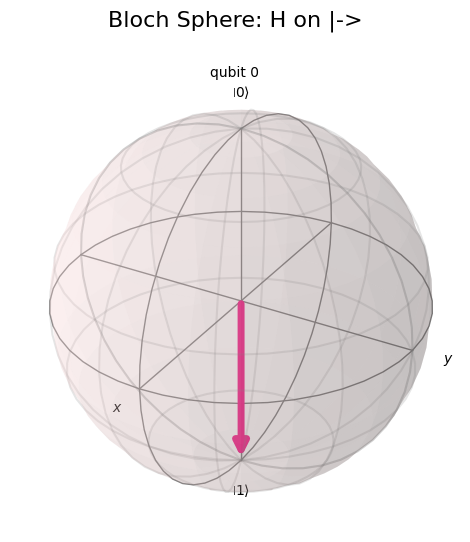

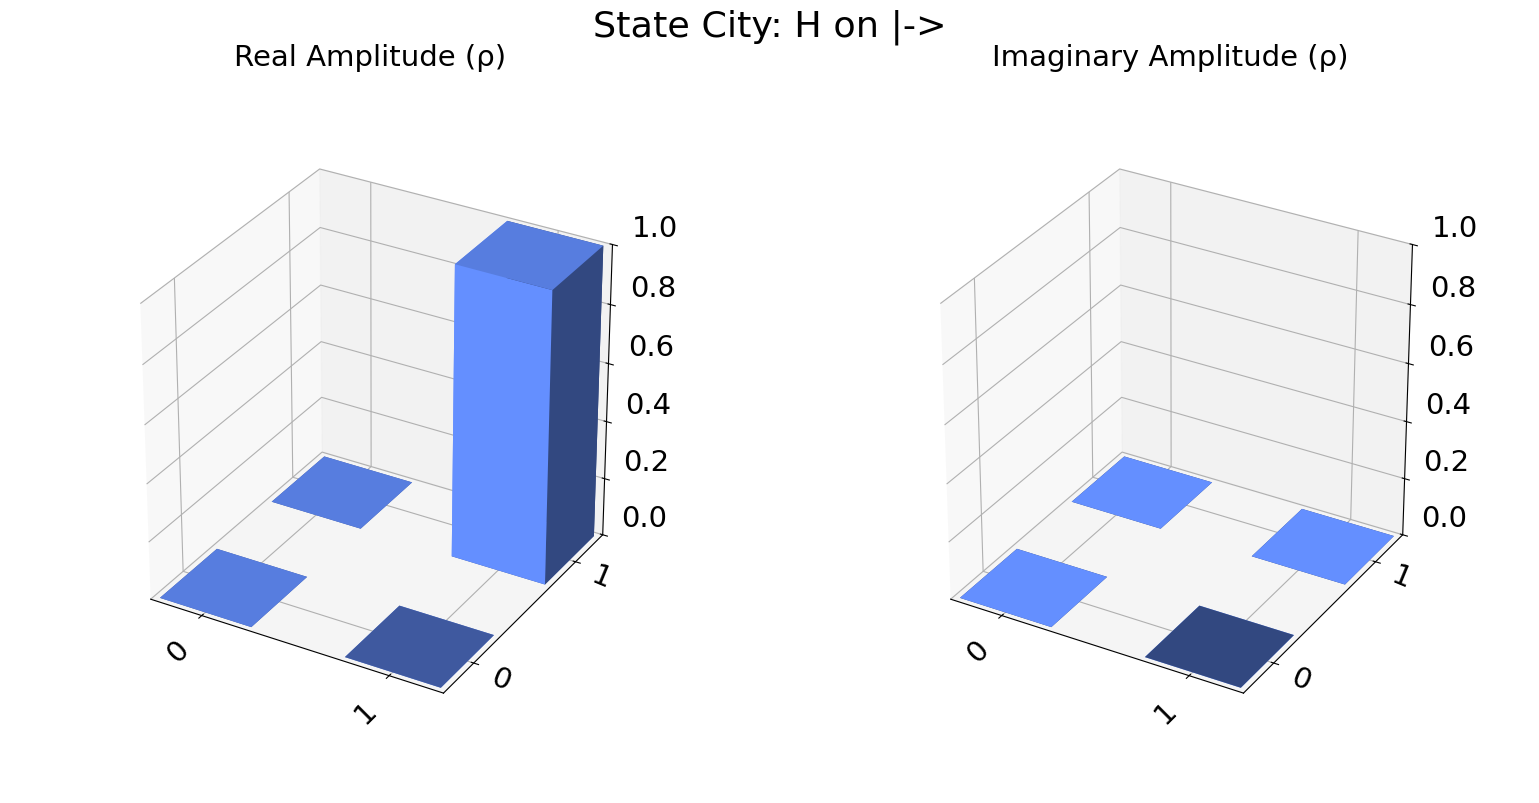

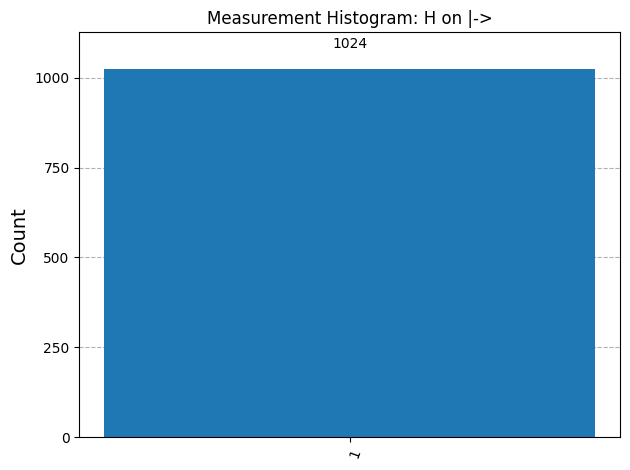

In [4]:
# -------------------------
# 3️⃣ Single Qubit Examples
# -------------------------

# |0>
visualize_hadamard(np.array([1, 0]), "|0>")

# |1>
visualize_hadamard(np.array([0, 1]), "|1>")

# |+> = (|0> + |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")

# |-> = (|0> - |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")


--- Two-Qubit H⊗H on |00> ---
Statevector: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


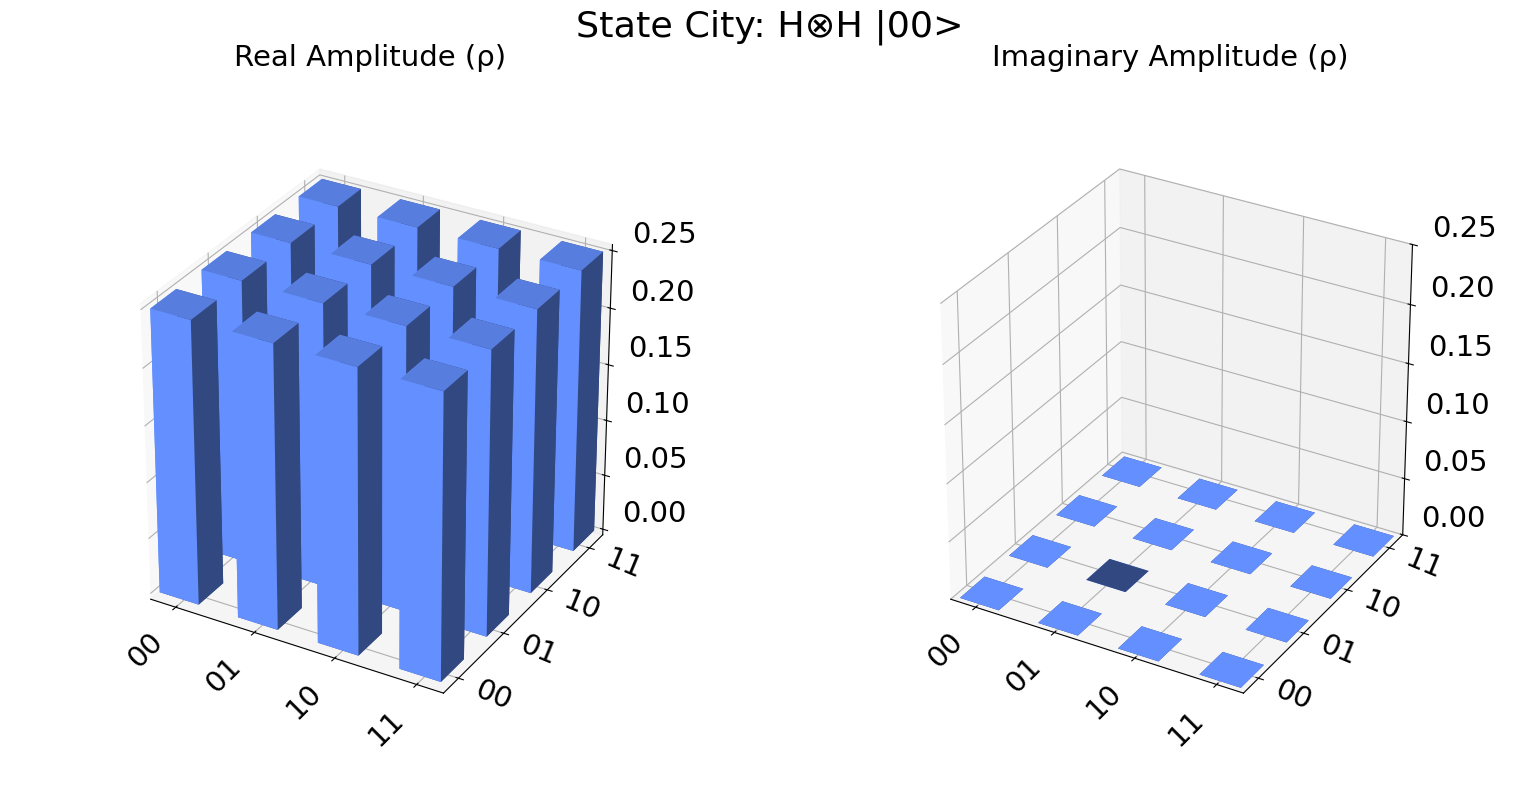

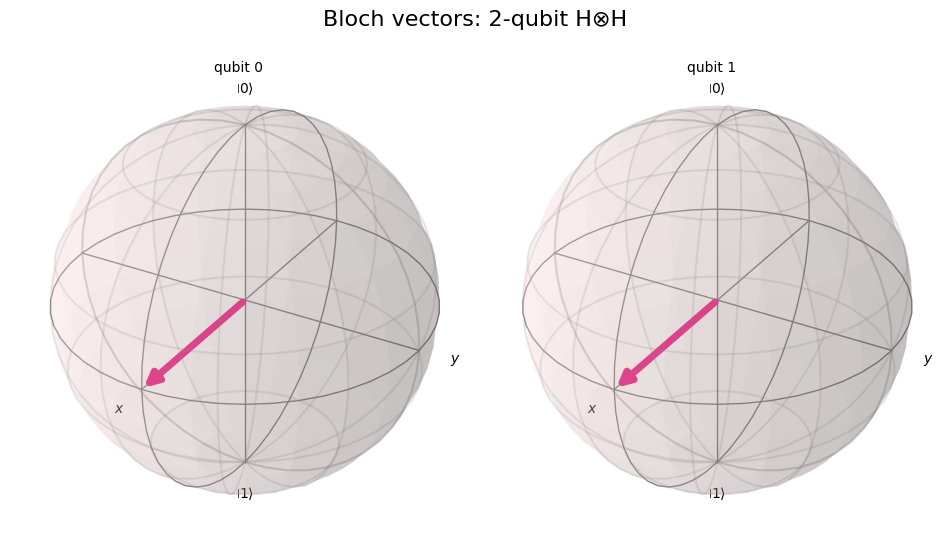

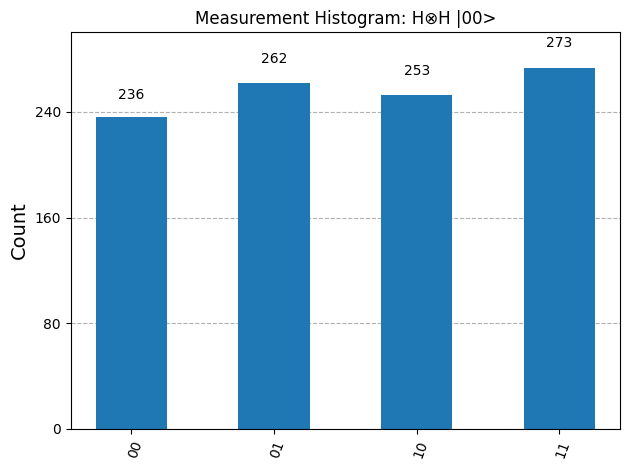


Analytical: equal probability for |00>, |01>, |10>, |11>.



In [5]:

# -------------------------
# 4️⃣ Two Qubit System: H⊗H
# -------------------------
qc2 = QuantumCircuit(2, 2)
qc2.h([0, 1])
qc2.measure([0, 1], [0, 1])

# Statevector before measurement
qc2_state = QuantumCircuit(2)
qc2_state.h([0, 1])
state2 = Statevector.from_instruction(qc2_state)

print("--- Two-Qubit H⊗H on |00> ---")
print("Statevector:", state2.data)

display(plot_state_city(state2, title="State City: H⊗H |00>"))
display(plot_bloch_multivector(state2, title="Bloch vectors: 2-qubit H⊗H"))

# Simulation
sim = AerSimulator()
qc2_t = transpile(qc2, sim)
result2 = sim.run(qc2_t, shots=1024).result()
counts2 = result2.get_counts()
display(plot_histogram(counts2, title="Measurement Histogram: H⊗H |00>"))
print("\nAnalytical: equal probability for |00>, |01>, |10>, |11>.\n")


--- Bell State (|00> + |11>)/√2 ---
Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


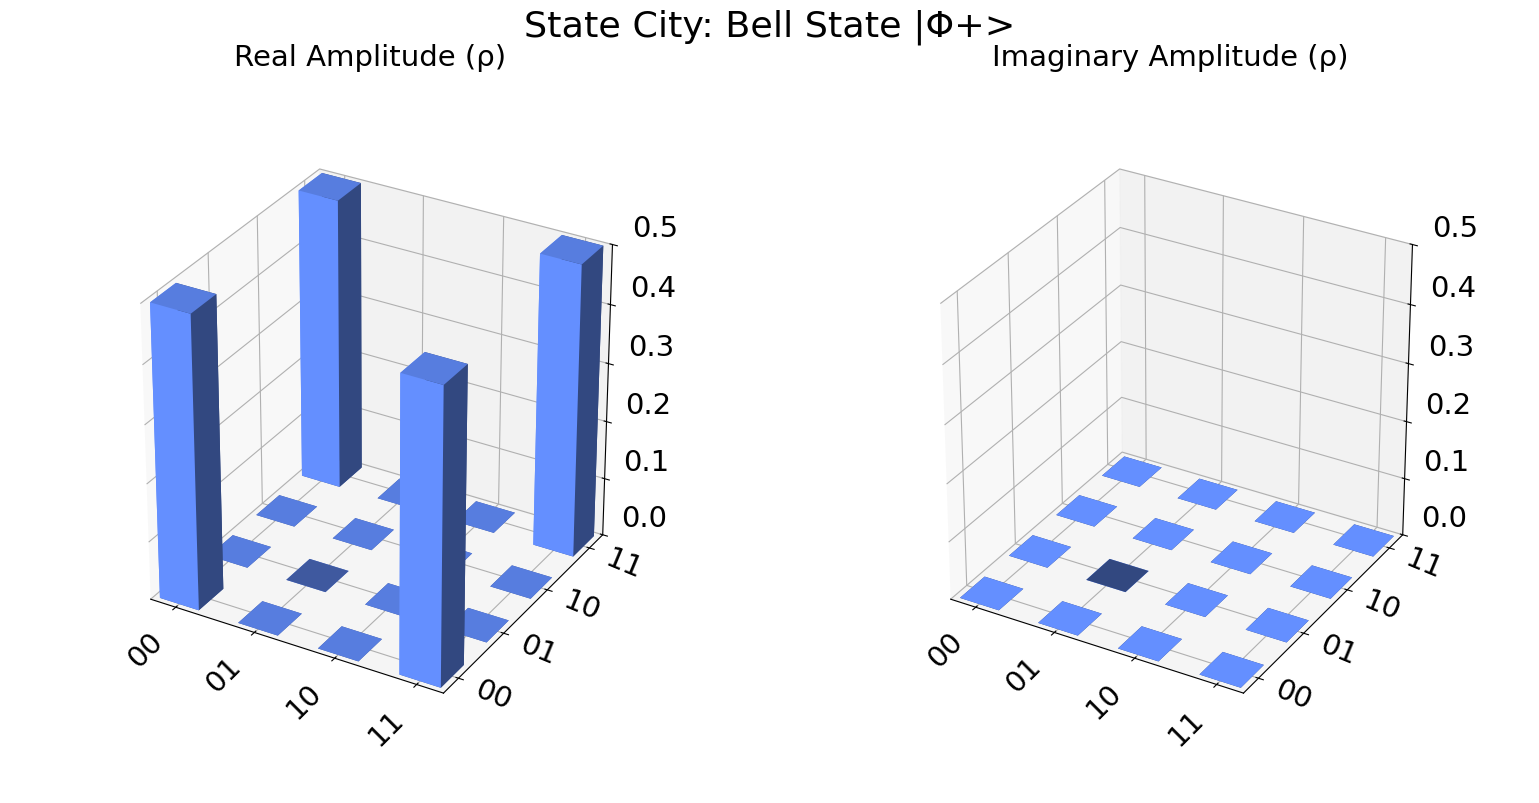

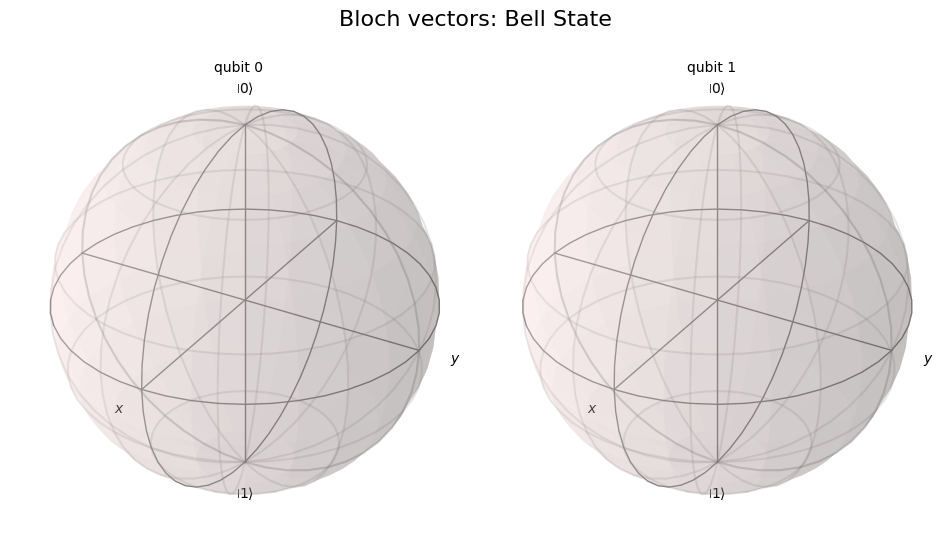

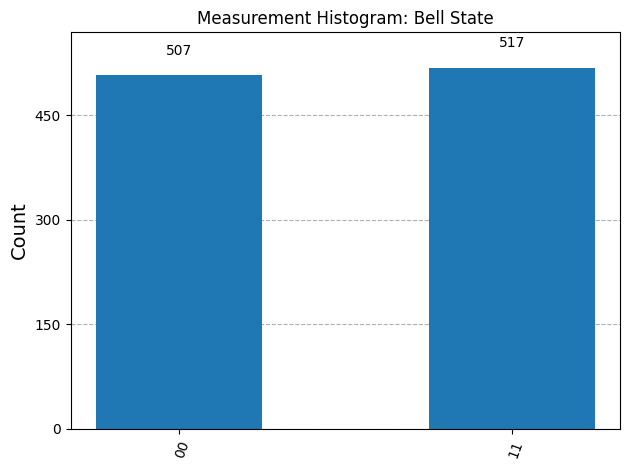


Analytical: outcomes |00> and |11> only, perfectly correlated.



In [6]:
# -------------------------
# 5️⃣ Entangled State (Bell Pair): H + CNOT
# -------------------------
qc_ent = QuantumCircuit(2, 2)
qc_ent.h(0)    # Hadamard on first qubit
qc_ent.cx(0, 1)  # CNOT: entangle qubits
qc_ent.measure([0, 1], [0, 1])

# Statevector before measurement
qc_ent_state = QuantumCircuit(2)
qc_ent_state.h(0)
qc_ent_state.cx(0, 1)
state_ent = Statevector.from_instruction(qc_ent_state)

print("--- Bell State (|00> + |11>)/√2 ---")
print("Statevector:", state_ent.data)

display(plot_state_city(state_ent, title="State City: Bell State |Φ+>"))
display(plot_bloch_multivector(state_ent, title="Bloch vectors: Bell State"))

# Simulation
qc_ent_t = transpile(qc_ent, sim)
result_ent = sim.run(qc_ent_t, shots=1024).result()
counts_ent = result_ent.get_counts()
display(plot_histogram(counts_ent, title="Measurement Histogram: Bell State"))
print("\nAnalytical: outcomes |00> and |11> only, perfectly correlated.\n")


 Task 1 — Predict the Statevector after Hadamard on |0⟩, |1⟩, |+⟩, |−⟩

After H on |0>: [0.70710678+0.j 0.70710678+0.j]


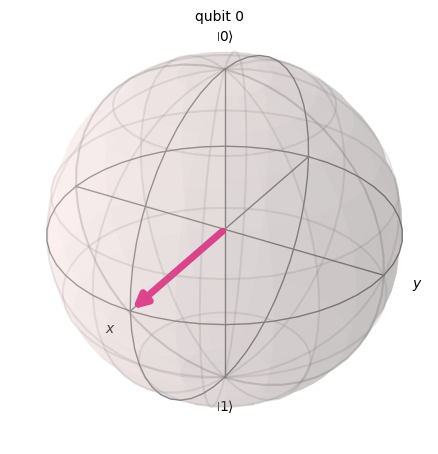

After H on |1>: [ 0.70710678+0.j -0.70710678+0.j]


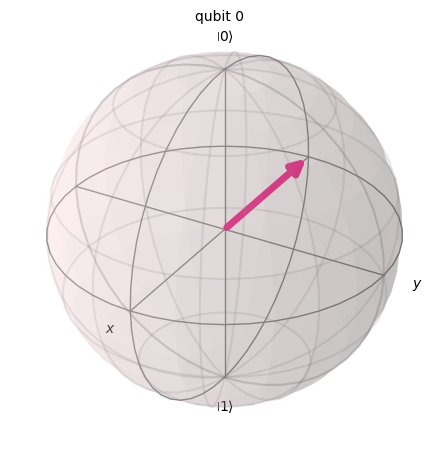

After H on |+>: [1.+0.j 0.+0.j]


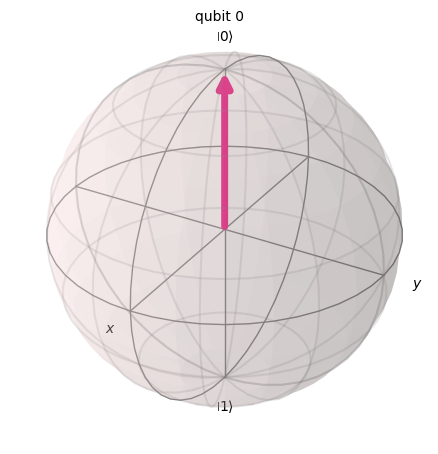

After H on |->: [0.+0.j 1.+0.j]


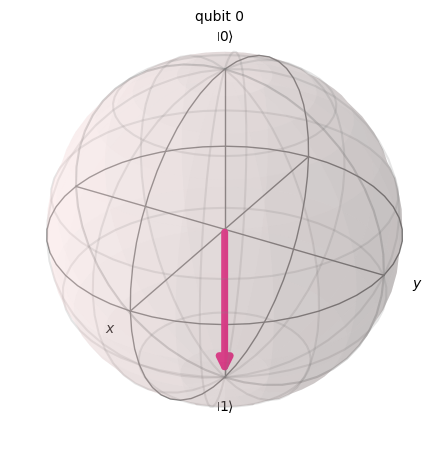

In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# Define input states
states = {'|0>': [1, 0], '|1>': [0, 1], '|+>': [1/np.sqrt(2), 1/np.sqrt(2)], '|->': [1/np.sqrt(2), -1/np.sqrt(2)]}

for label, vector in states.items():
    qc = QuantumCircuit(1)
    qc.initialize(vector, 0)
    qc.h(0)

    # Obtain final statevector
    final_state = Statevector.from_instruction(qc)
    print(f"After H on {label}: {final_state.data}")
    display(plot_bloch_multivector(final_state))

Task 2 — Create a 3-qubit system with H⊗H⊗H and Analyze Measurement Probabilities

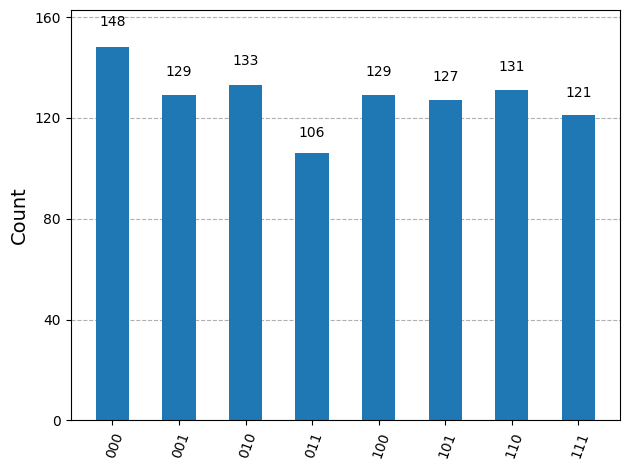

In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Build the quantum circuit
qc = QuantumCircuit(3, 3)
qc.h([0, 1, 2])
qc.measure([0, 1, 2], [0, 1, 2])

# Create AerSimulator instance
simulator = AerSimulator()

# Transpile your circuit for the simulator (important for AerSimulator)
qc_compiled = transpile(qc, simulator)

# Run the circuit on the simulator (returns a Qiskit job object)
job = simulator.run(qc_compiled, shots=1024)

# Get the result object
result = job.result()

# Extract and plot measurement counts from result
counts = result.get_counts()
qc.draw('mpl')
plot_histogram(counts)

Task 3: H + CX + CX on 3 Qubits, Analyze Correlations

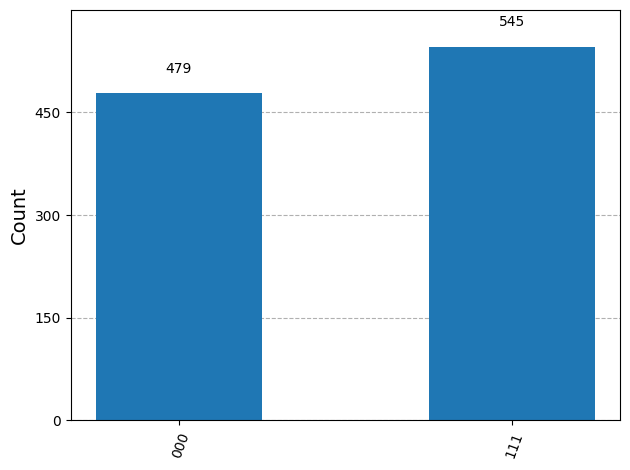

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create circuit
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure([0, 1, 2], [0, 1, 2])

# Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
job = sim.run(compiled, shots=1024)
counts = job.result().get_counts()

# Visualize
qc.draw('mpl')
plot_histogram(counts)


Task 4: Apply H Twice on |1> and Verify State

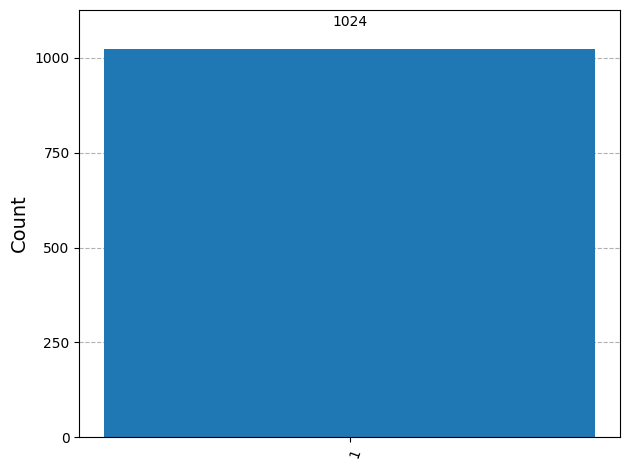

In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Build circuit: Start at |1>, H twice
qc = QuantumCircuit(1, 1)
qc.x(0)          # Prepare |1>
qc.h(0)
qc.h(0)
qc.measure(0, 0)

# Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
job = sim.run(compiled, shots=1024)
counts = job.result().get_counts()

# Visualize
qc.draw('mpl')
plot_histogram(counts)

Task 5: Bloch Sphere Rotations After Hadamard

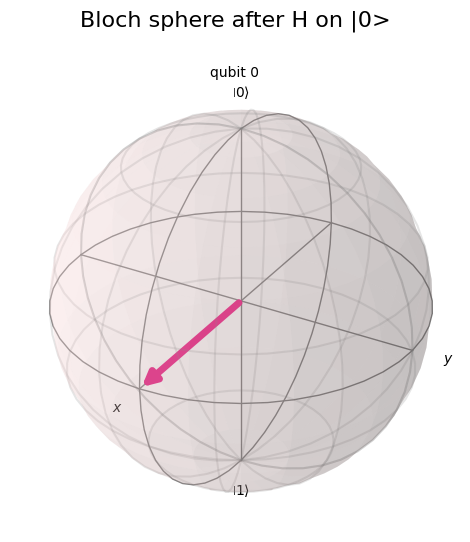

In [15]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# Start in |0> state, apply H, get statevector, plot Bloch
qc0 = QuantumCircuit(1)
qc0.h(0)
statevec0 = Statevector.from_instruction(qc0)
plot_bloch_multivector(statevec0, title="Bloch sphere after H on |0>")
